In [20]:
import numpy as np
import pandas as pd
import cv2 as cv

from sklearn.datasets import fetch_openml
from skimage.filters import threshold_otsu

from sklearn.model_selection import train_test_split #veri kümemizi eğitim ve test olarak böler.

from sklearn.tree import DecisionTreeClassifier #karar ağacı sınıflandırma modeli
from sklearn.ensemble import RandomForestClassifier # rastgele orman sınıflandırma modeli

from sklearn.metrics import accuracy_score # başarım ölçütü
from sklearn.metrics import f1_score # başarım ölçütü

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay # confusion matrix hesaplama ve gösterim

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
#MNIST veri kümesi yüklenmesi

minst = fetch_openml('mnist_784',version=1)

c:\Users\Burak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
X = minst["data"]
Y = minst["target"]
X.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780   
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0  \
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel781  pixel782  pixel783  pixel784  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [23]:
X[X['pixel775']!=0]

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9   
282       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  \
640       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1416      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1608      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3246      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
65988     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
65992     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
65999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
66000     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
66360     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779   
282        0.0  ...     223.0     110.0       0.0       0.0       0.0  \
640        0.0  ...      95.0       0.0       0.0       0.0       0.0   
1416       0.0  ...      28.0       1.0       0.0       0.0       0.0   
1608       0.0  ...      18.0       0.0       0.0       0.0       0.0   
3246       0.0  ...      19.0       0.0       0.0       0.0       0.0   
...        ...  ...       ...       ...       ...       ...       ...   
65988      0.0  ...      38.0     231.0     156.0       0.0       0.0   
65992      0.0  ...      27.0     253.0     110.0       0.0       0.0   
65999      0.0  ...      61.0     253.0     130.0       0.0       0.0   
66000      0.0  ...     253.0      74.0       0.0       0.0       0.0   
66360      0.0  ...     204.0      13.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
282         0.0       0.0       0.0       0.0       0.0  
640         0.0       0.0       0.0       0.0       0.0  
1416        0.0       0.0       0.0       0.0       0.0  
1608        0.0       0.0       0.0       0.0       0.0  
3246        0.0       0.0       0.0       0.0       0.0  
...         ...       ...       ...       ...       ...  
65988       0.0       0.0       0.0       0.0       0.0  
65992       0.0       0.0       0.0       0.0       0.0  
65999       0.0       0.0       0.0       0.0       0.0  
66000       0.0       0.0       0.0       0.0       0.0  
66360       0.0       0.0       0.0       0.0       0.0  

[113 rows x 784 columns]

In [24]:
Y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [25]:
Y.unique().tolist()

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']

In [26]:
pd.DataFrame(Y).groupby("class").size()

class
0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

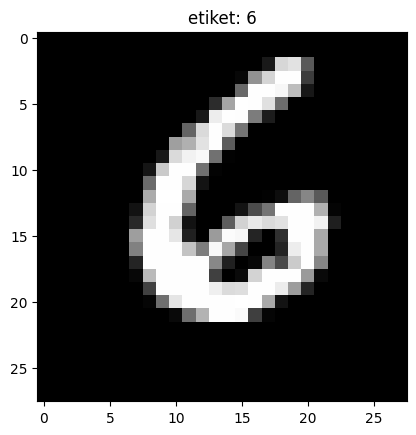

In [27]:
X = minst["data"].to_numpy()
Y = minst["target"]

#örnek bir görüntü seçme

image_index = 90
image = X[image_index].reshape(28,28)

#Görüntüyü gösterme
plt.imshow(image,cmap="gray")
plt.title("etiket: "+str(Y[image_index]))
plt.show()

In [28]:
image.shape

(28, 28)

In [29]:
X_clean = []

for image in X:
    threshold_value = threshold_otsu(image)
    binary_image = image > threshold_value
    X_clean.append(binary_image.flatten())

In [30]:
X_clean

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
      

In [31]:
# Veriyi train ve test olarak bölme

X_train, X_test, y_train, y_test = train_test_split(X_clean,Y,test_size=0.2,random_state=42)

In [32]:
len(X_train)

56000

In [46]:
## makine öğrenmesi

model = DecisionTreeClassifier()

#model eğitimi
model.fit(X_train,y_train)

# test veri kümesi üzerinden tahmin yapılması

y_pred = model.predict(X_test)

In [34]:
y_pred

array(['8', '4', '6', ..., '2', '7', '1'], dtype=object)

In [48]:
y_test

46730    8
48393    4
41416    8
34506    7
43725    7
        ..
21525    3
16276    5
24390    2
28061    7
63452    1
Name: class, Length: 14000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [53]:
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

accuracy:  0.8684285714285714


In [51]:
f1_score = f1_score(y_test,y_pred,average="weighted")
print("f1_score",f1_score)

TypeError: 'numpy.float64' object is not callable

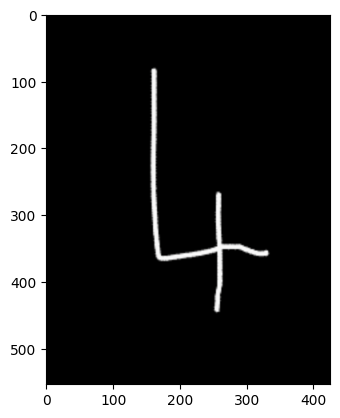

In [61]:
# dışarıdan örnek veri ile test edilme

image = cv.imread("data/dort-230621-130217.png")
image = cv.cvtColor(image,cv.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)

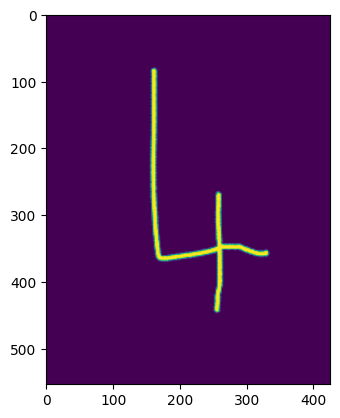

In [63]:
image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image)

In [64]:
image.shape

(554, 426)

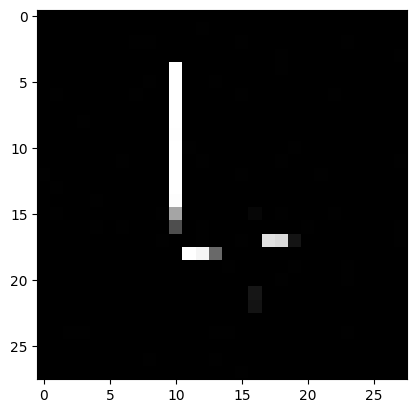

In [65]:
image = cv.resize(image,(28,28))
plt.imshow(image,cmap="gray")

In [66]:
image.shape

(28, 28)

In [67]:
image_array = np.array(image)

threshold_value = threshold_otsu(image_array)
binary_image = image > threshold_value
image_array = binary_image.flatten()

image_array = image_array.reshape(1,-1)

image_array

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
      

In [68]:
prediction = model.predict(image_array)

print("Tahmin :",prediction)

Tahmin : ['4']


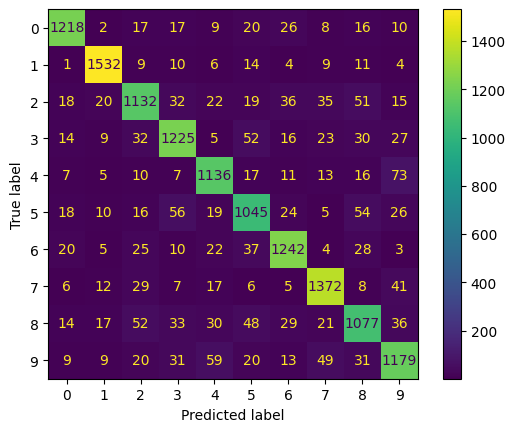

In [69]:
cm = confusion_matrix(y_test,y_pred,labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()

In [73]:
from sklearn import metrics
# Veriyi train ve test olarak bölme

X_train, X_test, y_train, y_test = train_test_split(X_clean,Y,test_size=0.2,random_state=42)

model = RandomForestClassifier()

#model eğitimi
model.fit(X_train,y_train)

# test veri kümesi üzerinden tahmin yapılması

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ",accuracy)

f1_score = metrics.f1_score(y_test,y_pred,average="weighted")
print("f1_score: ",f1_score)

accuracy:  0.9654285714285714
f1_score:  0.9653872455353208
